In [355]:
#! python3
# Library of functions to load metadata from various places, and merge into unified patient, biosample tables.
# Usage: generate_biosample_table()
# Requires: 
# 
# Owen Chapman

import pandas as pd
import pathlib
import os

## Function to load metadata from the AmpliconClassifier results
## Get this file from /expanse/lustre/projects/csd677/collab/projects/pedpancan/AmpliconClassifier/batch/inputs
def get_pedpancan_biosamples_from_AC(include_x01=True,path='pedpancan_summary_map.txt'):
    path = pathlib.Path(path)
    df = pd.read_csv(path, sep='\t', header=None, index_col=0, names = ["biosample","file"])
    if not include_x01:
        df['firstletter']=df.index.map(lambda x: x[0])
        df = df[df.firstletter != 'P']
    return df.index
get_pedpancan_biosamples_from_AC()

Index(['BS_85Y70BHE', 'BS_A9S5HT6P', 'BS_1EQGGHHQ', 'BS_BR1X3R68',
       'BS_JDMM2XG4', 'BS_859AV1DB', 'BS_RCC7ZEC0', 'BS_9KDA3HG6',
       'BS_E0S2Y0TS', 'BS_1C4WCNQF',
       ...
       'BS_HM1ZDCR6', 'BS_F2H0BZ0D', 'BS_X3KSK1AF', 'BS_GBSSZBMF',
       'BS_9VJ3VV46', 'BS_CNMM5BCD', 'BS_F2YGCAHF', 'BS_A3S28ANC',
       'BS_AWZ2XZ49', 'BS_PCMHH474'],
      dtype='object', name='biosample', length=4723)

In [560]:
## Functions to load metadata from the CAVATICA API. 
## See also 2023-11-27_cavatica-api/cavatica-api.ipynb
def import_x01_biosample_metadata(path="X01-biosample-metadata.tsv"):
    path = pathlib.Path(path)
    df = pd.read_csv(path, sep='\t',index_col=0)
    df["cohort"]="PBTA-X01"
    return df
def import_x00_biosample_metadata(path="X00-biosample-metadata.tsv"):
    df = import_x01_biosample_metadata(path)
    df["cohort"]="PBTA-X00"
    return df
def import_pnoc_biosample_metadata(path="PNOC-biosample-metadata.tsv"):
    df = import_x01_biosample_metadata(path)
    df["cohort"]="PNOC"
    return df
x01 = import_x01_biosample_metadata()
x00 = import_x00_biosample_metadata()
df = x01
# df = pd.concat([x01, x00], axis=1)
df.head(50)


,gender,race,ethnicity,Kids First Participant ID,disease_type,sample_id,Tumor Descriptor,primary_site,age_at_diagnosis,Kids First Biospecimen ID Normal,case_id,WGS_UUID,cohort
Kids First Biospecimen ID,,,,,,,,,,,,,
BS_92T7PSY6,Male,White,Not Hispanic or Latino,PT_01SH4F1X,Ganglioglioma,7316-6365,Initial CNS Tumor,Temporal Lobe,3838.0,BS_SP07ABJ6,C2578326,afe1b9a2-5869-43c4-a56f-6528440436ba,PBTA-X01
BS_T6A1KCT6,Male,Asian,Not Hispanic or Latino,PT_02QZ7Z0H,Teratoma,7316-3804,Initial CNS Tumor,Pineal Gland,632.0,BS_3A20RBVE,C976620,b166a462-a3b9-4a84-902f-fee597a39cd5,PBTA-X01
BS_Q3H2JNNM,Female,White,Not Hispanic or Latino,PT_0324HWD5,High-grade glioma/astrocytoma (WHO grade III/IV),7316-7091,Initial CNS Tumor,Temporal Lobe,3121.0,BS_PCFP168F,C2857659,1f5badfa-8eb1-4a45-8cde-c2ca3d010cf8,PBTA-X01
BS_MQFW7E1K,Female,Other,Hispanic or Latino,PT_0449KSQ3,Other;Low-grade glioma/astrocytoma (WHO grade ...,7316-6384,Initial CNS Tumor,Frontal Lobe,3900.0,BS_CZ1T9EBV,C3224937,db1e69ed-f682-41a8-9c0f-a01cdfa6013e,PBTA-X01
BS_VGP89Y0H,Male,Other,Not Reported,PT_047YGDRW,Low-grade glioma/astrocytoma (WHO grade I/II),7316-6811,Initial CNS Tumor,Cerebellum/Posterior Fossa,1258.0,BS_8QKDGV8X,C3550764,b8ae55bb-9e39-44bc-9062-6634fc7d8894,PBTA-X01
BS_KZ2HT460,Male,White,Not Hispanic or Latino,PT_04V47WFC,Ependymoma,7316-4437,Initial CNS Tumor,Ventricles,5717.0,BS_S22F7BFS,C1223727,808d94c7-ac80-41ff-8526-244eae7c018d,PBTA-X01
BS_BY9RMEKY,Male,White,Not Hispanic or Latino,PT_04V47WFC,Ependymoma,7316-8116,Progressive,Brain Stem-Medulla;Brain Stem- Midbrain/Tectum...,6710.0,BS_S22F7BFS,C1223727,2af6df74-b229-4cef-8266-0b51e4534c0e,PBTA-X01
BS_3E1HC152,Male,White,Not Hispanic or Latino,PT_04V47WFC,Ependymoma,7316-7099,Progressive,Brain Stem-Medulla;Cerebellum/Posterior Fossa;...,6481.0,BS_S22F7BFS,C1223727,629faecf-d29c-4772-a83a-ed791e160815,PBTA-X01
BS_Q6G59VRZ,Male,White,Not Hispanic or Latino,PT_04V47WFC,Ependymoma,7316-7535,Progressive,Brain Stem-Medulla;Brain Stem- Midbrain/Tectum...,6654.0,BS_S22F7BFS,C1223727,708094ed-3c14-4a7a-823b-4046e2cb2c0d,PBTA-X01


In [561]:
def clean_cavatica_biosample_metadata(df):
    '''
    Clean known errors in the x01 metadata, and unify ontologies.
    '''
    # remove suffix from pnoc sample ids
    
    
    df = df.replace({
        'Tumor Descriptor':{
            "initial CNS Tumor": "Diagnosis",
            "Not Applicable": None,
            "Unavailable": None,
            "Initial CNS Tumor": "Diagnosis",
            "Progressive Disease Post-Mortem": "Progressive",
        },
        'gender':{
            "Not Reported": None
        }
    })
    # Correct suspected errors
    df.loc["BS_6Z213H2V","Tumor Descriptor"] = "Progressive" # This tumor was resected 175 days after the initial tumor resection.
    df.loc["BS_1135HC0V","Tumor Descriptor"] = "Second Malignancy" # This dysplasia was diagnosed 574 days after the first tumor was resected, in a new location.
    df.loc["BS_ZS1QRMXS","Tumor Descriptor"] = "Progressive" # Tumor resected 128 days after previous resection.
    df.loc["BS_FVYBGMG1","Tumor Descriptor"] = "Progressive" # Tumor resected 107 days after previous resection.
    df.loc["BS_5J5VH3X0","Tumor Descriptor"] = "Progressive" # Biopsied 240 days after previous biopsy.
    df.loc["BS_E9M7TDB6","Tumor Descriptor"] = "Progressive" # Second resection in different location 112 days after previous resection.
    df.loc["BS_5XZP7F4Q","Tumor Descriptor"] = "Progressive" # Second resection 1845 days after previous
    df.loc["BS_EXTEGB51","Tumor Descriptor"] = "Progressive" # Third resection 1922 days after previous
    df.loc["BS_93BV8AY9","Tumor Descriptor"] = "Second Malignancy" # Second diagnosis 2975 days after initial.
    df.loc["BS_CRKBDAYZ","Tumor Descriptor"] = "Progressive" # Series of progressive diagnoses long after initial.
    df.loc["BS_B4DY7ET3","Tumor Descriptor"] = "Progressive" # Second resection 119 days after previous.
    return df 

df = clean_cavatica_biosample_metadata(x01)
df.head()


,gender,race,ethnicity,Kids First Participant ID,disease_type,sample_id,Tumor Descriptor,primary_site,age_at_diagnosis,Kids First Biospecimen ID Normal,case_id,WGS_UUID,cohort
Kids First Biospecimen ID,,,,,,,,,,,,,
BS_92T7PSY6,Male,White,Not Hispanic or Latino,PT_01SH4F1X,Ganglioglioma,7316-6365,Diagnosis,Temporal Lobe,3838.0,BS_SP07ABJ6,C2578326,afe1b9a2-5869-43c4-a56f-6528440436ba,PBTA-X01
BS_T6A1KCT6,Male,Asian,Not Hispanic or Latino,PT_02QZ7Z0H,Teratoma,7316-3804,Diagnosis,Pineal Gland,632.0,BS_3A20RBVE,C976620,b166a462-a3b9-4a84-902f-fee597a39cd5,PBTA-X01
BS_Q3H2JNNM,Female,White,Not Hispanic or Latino,PT_0324HWD5,High-grade glioma/astrocytoma (WHO grade III/IV),7316-7091,Diagnosis,Temporal Lobe,3121.0,BS_PCFP168F,C2857659,1f5badfa-8eb1-4a45-8cde-c2ca3d010cf8,PBTA-X01
BS_MQFW7E1K,Female,Other,Hispanic or Latino,PT_0449KSQ3,Other;Low-grade glioma/astrocytoma (WHO grade ...,7316-6384,Diagnosis,Frontal Lobe,3900.0,BS_CZ1T9EBV,C3224937,db1e69ed-f682-41a8-9c0f-a01cdfa6013e,PBTA-X01
BS_VGP89Y0H,Male,Other,Not Reported,PT_047YGDRW,Low-grade glioma/astrocytoma (WHO grade I/II),7316-6811,Diagnosis,Cerebellum/Posterior Fossa,1258.0,BS_8QKDGV8X,C3550764,b8ae55bb-9e39-44bc-9062-6634fc7d8894,PBTA-X01


In [563]:
## Function to compile CAVATICA metatdata for all CBTN samples in our cohort.
def import_cbtn_biosample_metadata(include_X01=True):
    if include_X01:
        df = pd.concat([import_x00_biosample_metadata(),import_x01_biosample_metadata(),import_pnoc_biosample_metadata()])
    else:
        df = pd.concat([import_x00_biosample_metadata(),import_pnoc_biosample_metadata()])
    cohort = get_pedpancan_biosamples_from_AC()
    df = df[df.index.isin(cohort)]
    df = clean_cavatica_biosample_metadata(df)
    return df
x01 = import_cbtn_biosample_metadata(include_X01=True)
import pandas as pd

# Assuming df1 and df2 are the DataFrames you want to merge
# Ensure both DataFrames have unique index values
x00.reset_index(drop=False, inplace=True)
x01.reset_index(drop=False, inplace=True)

# Concatenate the DataFrames
# df = pd.concat([x00, x01], axis=1)
df = x01
# Now merged_df contains both DataFrames concatenated along the columns axis
df.head()

,Kids First Biospecimen ID,gender,race,ethnicity,Kids First Participant ID,disease_type,sample_id,Tumor Descriptor,primary_site,age_at_diagnosis,Kids First Biospecimen ID Normal,case_id,WGS_UUID,cohort
0,BS_K07KNTFY,Male,White,Not Hispanic or Latino,PT_00G007DM,Other,7316-272,Diagnosis,Cerebellum/Posterior Fossa,464.0,NaN,C27429,7b06bec0-c64a-4df4-8237-d07de0a5df42,PBTA-X00
1,BS_AQMKA8NC,Male,White,Not Hispanic or Latino,PT_00G007DM,Other,7316-2577,Recurrence,Cerebellum/Posterior Fossa,3178.0,NaN,C27429,9ba06668-759e-440c-a22f-957df52dae06,PBTA-X00
2,BS_TE8QFF7T,Male,White,Not Hispanic or Latino,PT_01MZ62KG,Pineoblastoma,7316-447,Progressive,Cerebellum/Posterior Fossa,546.0,NaN,C92004,bd68f356-781e-49d8-a5ff-ec6c12514dc1,PBTA-X00
3,BS_2VB8649B,Male,Black or African American,Not Available,PT_02J5CWN5,Low-grade glioma/astrocytoma (WHO grade I/II),7316-2989,Diagnosis,Suprasellar/Hypothalamic/Pituitary,2223.0,NaN,C90159,3cdb9fca-94cf-4938-9d20-cd1b0c59f6a0,PBTA-X00
4,BS_5TT6TT4K,Male,Black or African American,Not Available,PT_02J5CWN5,Low-grade glioma/astrocytoma (WHO grade I/II),7316-898,Progressive,Suprasellar/Hypothalamic/Pituitary,3722.0,NaN,C90159,2c620221-1561-4073-8558-f81e4b3c9dcc,PBTA-X00


In [564]:
histologies = pd.read_csv("pedpancan_histologies.tsv", sep='\t')
# histologies.set_index("Kids_First_Biospecimen_ID", inplace=True)
histologies.head(20)

/var/folders/vv/261hv1sn1h36hvx1wc1cv9w40000gp/T/ipykernel_49058/4084201033.py:1: DtypeWarning: Columns (1,21,24,25,26,27,33,36,37,41,43,45,47,48,49,51) have mixed types. Specify dtype option on import or set low_memory=False.
  histologies = pd.read_csv("pedpancan_histologies.tsv", sep='\t')


,Kids_First_Biospecimen_ID,sample_id,aliquot_id,Kids_First_Participant_ID,experimental_strategy,sample_type,composition,tumor_descriptor,primary_site,reported_gender,race,ethnicity,age_at_diagnosis_days,pathology_diagnosis,RNA_library,OS_days,OS_status,EFS_days,cohort,age_last_update_days,seq_center,cancer_predispositions,pathology_free_text_diagnosis,cohort_participant_id,extent_of_tumor_resection,CNS_region,gtex_group,gtex_subgroup,germline_sex_estimate,normal_fraction,tumor_fraction,tumor_ploidy,age_at_event_days,clinical_status_at_event,age_at_chemo_start,age_at_radiation_start,cell_line_composition,cell_line_passage,tumor_fraction_RFpurify_ABSOLUTE,tumor_fraction_RFpurify_ESTIMATE,tumor_fraction_LUMP,dkfz_v11_methylation_subclass,dkfz_v11_methylation_subclass_score,dkfz_v12_methylation_subclass,dkfz_v12_methylation_subclass_score,dkfz_v12_methylation_mgmt_status,dkfz_v12_methylation_mgmt_estimated,molecular_subtype,integrated_diagnosis,Notes,harmonized_diagnosis,molecular_subtype_methyl,broad_histology,short_histology,cancer_group
0,BS_007JTNB8,7316-2558,655073,PT_1MW98VR1,WGS,Tumor,Solid Tissue,Initial CNS Tumor,Cerebellum/Posterior Fossa,Male,White,Not Hispanic or Latino,1872.0,Ependymoma,NaN,687.0,LIVING,687.0,PBTA,2559.0,NantOmics,None documented,anaplastic ependymoma who grade iii,C632220,Gross/Near total resection,Posterior fossa,NaN,NaN,Male,0.322404,0.677596,2.0,1872.0,Alive,NaN,1906.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EPN, PF A",Posterior fossa group A (PFA) ependymoma,Updated via OpenPedCan subtyping,Posterior fossa group A (PFA) ependymoma,"EPN, PF A",Ependymal tumor,Ependymoma,Ependymoma
1,BS_00DBDSHZ,7316-6843,1238135,PT_FNMF9D6R,WGS,Tumor,Solid Tissue,Initial CNS Tumor,Frontal Lobe,Female,Reported Unknown,Unavailable,1547.0,Atypical Teratoid Rhabdoid Tumor (ATRT),NaN,NaN,LIVING,NaN,PBTA,1547.0,NaN,None documented,atypical teratoid rhabdoid tumor (atrt),C3473274,Gross/Near total resection,Hemispheric,NaN,NaN,Female,0.399755,0.600245,4.0,1547.0,Alive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"ATRT, MYC","Atypical Teratoid Rhabdoid Tumor, MYC",Subtype based on methylation;Updated via OpenP...,"Atypical Teratoid Rhabdoid Tumor, MYC","ATRT, MYC",Embryonal tumor,ATRT,Atypical Teratoid Rhabdoid Tumor
2,BS_00FD2KMP,7316-8716,1040291_RNA_T,PT_SW4Q1HZP,RNA-Seq,Tumor,Solid Tissue,Initial CNS Tumor,right anterior temporal lobe,Male,Reported Unknown,Not Hispanic or Latino,NaN,High-grade glioma/astrocytoma (WHO grade III/IV),exome_capture,NaN,NaN,NaN,PBTA,NaN,CHOP DGD,None documented,Glioblastoma,C3172908,Not Reported,Hemispheric,NaN,NaN,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"HGG, H3 wildtype, TP53","High-grade glioma, IDH-wildtype and H3-wildtype",Updated via OpenPedCan subtyping,"High-grade glioma, IDH-wildtype and H3-wildtype",NaN,Diffuse astrocytic and oligodendroglial tumor,HGAT,High-grade glioma
3,BS_00GG0R70,7316-6381,1228425,PT_YTZJ8K0X,WGS,Tumor,Solid Tissue,Second Malignancy,Cerebellum/Posterior Fossa,Male,Native Hawaiian or Other Pacific Islander,Not Hispanic or Latino,5774.0,High-grade glioma/astrocytoma (WHO grade III/IV),NaN,3076.0,LIVING,2918.0,PBTA,6655.0,NaN,None documented,"glioblastoma, idh1 r132h-wild type, who grade iv",C3224691,Biopsy only;Gross/Near total resection,Posterior fossa,NaN,NaN,Male,0.325268,0.674732,2.0,5774.0,Alive,3321.0,5806.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"HGG, H3 wildtype, TP53","High-grade glioma, IDH-wildtype and H3-wildtype",Updated via OpenPedCan subtyping,"High-grade glioma, IDH-wildtype and H3-wildtype","HGG, H3 wildtype",Diffuse astrocytic and oligodendroglial tumor,HGAT,High-grade glioma
4,BS_00JRW8F2,7316-8427,1228477,PT_9C7GK4YB,WGS,Tumor,Solid Tissue,Initial CNS Tumor,Cerebellum/Posterior Fossa,Male,White,Not Hispanic or Latino,2782.0,Low-grade glioma/astrocytoma (WHO grade I/II),NaN,266.0,LIVING,266.0,PBTA,3048.0,NaN,None documented,pilocytic astrocytoma who gr i,C3631083,Gross/Near total resecti

In [565]:
## Functions to open & preprocess opentarget histology data.
## Get histologies.tsv from https://github.com/d3b-center/OpenPedCan-analysis/blob/dev/analyses/molecular-subtyping-integrate/results/histologies.tsv

def clean_opentarget_histologies_files(df):
    cohort = import_cbtn_biosample_metadata()
    df = df[df.sample_id.isin(cohort.sample_id)]
    df = df[df.sample_type == 'Tumor'] # Drop normals
    df = df[df.composition != 'Derived Cell Line'] # Drop cell lines
    df = df[df.experimental_strategy != "Targeted Sequencing"] # these metadata are very different
    df = df.drop(["RNA_library","seq_center","pathology_free_text_diagnosis","gtex_group","gtex_subgroup","normal_fraction",
                  "cell_line_composition","cell_line_passage","tumor_fraction_RFpurify_ABSOLUTE",
                  "tumor_fraction_RFpurify_ESTIMATE","tumor_fraction_LUMP","dkfz_v12_methylation_mgmt_status",
                  "dkfz_v12_methylation_mgmt_estimated","integrated_diagnosis",
                  "tumor_fraction","tumor_ploidy","cohort"],axis=1) # drop columns we know we don't want
    df = df.replace({
        'composition':{
            "Not Available": None,
        },
        'extent_of_tumor_resection':{
            "Not Reported":None,
            'Unavailable':None,
            'Not Applicable':None
        },
    })
    
    # correct known errors
    df.loc["BS_K14VJ1E3","age_at_diagnosis_days"] = 2778
    df = df[df['Kids_First_Biospecimen_ID'] != "BS_03G6PJKJ"]
    df = df[df['Kids_First_Biospecimen_ID'] != "BS_HJJPT3NR"]
    df = df[df['Kids_First_Biospecimen_ID']!= "BS_15R0SQRN"]
    df = df[df['Kids_First_Biospecimen_ID'] != "BS_GGDMSB26"]
    df = df[df['Kids_First_Biospecimen_ID'] != "BS_VQGR0D61"]
    
    # Propagate metadata from the same sample_id
    g = df.groupby('sample_id')
    df = []
    for name, group in g:
        columns = [col for col in group.columns if col not in ['sample_id','aliquot_id','experimental_strategy']]
        for column in columns:
            unique_values = group[column].dropna().unique()
            if len(unique_values) == 0:
                continue
            elif len(unique_values) == 1:
                non_na_value = unique_values[0]
                group[column].fillna(non_na_value, inplace=True)
            else:
                print(f"Warning: The column '{column}' for sample {name} differs between CAVATICA and opentarget annotations.")
        group=group.sort_values('experimental_strategy')
        df.append(group)
    df = pd.concat(df)
    
    # Add entries missing a KF biospecimen ID, but with a matching external biosample id.
    missing_bs = (cohort[~cohort.index.isin(df.index)]["sample_id"]).sort_values()
    print(f"{len(missing_bs)} KF biospecimens missing from the opentarget histologies table...")
    missing_bs = missing_bs[missing_bs.isin(df.sample_id)]
    print(f"found {len(missing_bs)} matching external sample IDs, adding to table...")
    newdf = []
    for biospecimen, sample in missing_bs.items():
        newentry=df[df.sample_id==sample].iloc[0]
        newentry.name = biospecimen
        newdf.append(newentry)
    newdf = pd.DataFrame(newdf)
    df = pd.concat([df,newdf])
    
    # Subset our cohort
    df = df[df.index.isin(cohort.index)]
    return df
histologies = clean_opentarget_histologies_files(histologies)
histologies.head(10)

2500 KF biospecimens missing from the opentarget histologies table...
found 2351 matching external sample IDs, adding to table...


,Kids_First_Biospecimen_ID,sample_id,aliquot_id,Kids_First_Participant_ID,experimental_strategy,sample_type,composition,tumor_descriptor,primary_site,reported_gender,race,ethnicity,age_at_diagnosis_days,pathology_diagnosis,OS_days,OS_status,EFS_days,age_last_update_days,cancer_predispositions,cohort_participant_id,extent_of_tumor_resection,CNS_region,germline_sex_estimate,age_at_event_days,clinical_status_at_event,age_at_chemo_start,age_at_radiation_start,dkfz_v11_methylation_subclass,dkfz_v11_methylation_subclass_score,dkfz_v12_methylation_subclass,dkfz_v12_methylation_subclass_score,molecular_subtype,Notes,harmonized_diagnosis,molecular_subtype_methyl,broad_histology,short_histology,cancer_group
BS_1RFBH1SP,BS_458X47PJ,7316-10,1114560,PT_K8ZV7APT,Methylation,Tumor,Solid Tissue,Initial CNS Tumor,Spinal Cord- Lumbar/Thecal Sac,Female,Black or African American,Not Hispanic or Latino,3899.0,Neurofibroma/Plexiform,7105.0,LIVING,4408.0,11004.0,"Neurofibromatosis, Type 1 (NF-1)",C15129,Partial resection,Spine,Female,6616.0,Alive,9204.0,NaN,"SCHW, MEL",0.598,NFIB_PLEX,0.507953,NaN,NaN,Neurofibroma/Plexiform,NaN,Tumor of cranial and paraspinal nerves,Neurofibroma,Neurofibroma/Plexiform
BS_4RS1SC48,BS_Q37DRN94,7316-101,1112551,PT_CWD717Q0,Methylation,Tumor,Solid Tissue,Initial CNS Tumor,Temporal Lobe,Male,Black or African American,Not Hispanic or Latino,3472.0,Ganglioglioma,536.0,LIVING,536.0,4008.0,None documented,C23862,Gross/Near total resection,Hemispheric,Male,3472.0,Alive,NaN,NaN,"LGG, PA/GG ST",0.479,PA_CORT,0.825647,"GNG, other MAPK",Updated via OpenPedCan subtyping,"Ganglioglioma, other MAPK","GNT, MAPK",Low-grade astrocytic tumor,Ganglioglioma,Ganglioglioma
BS_ZGSTZCYN,BS_24KYA5PH,7316-1017,1251886,PT_0DWRY9ZX,Methylation,Tumor,Solid Tissue,Recurrence,Frontal Lobe,Male,White,Not Hispanic or Latino,3804.0,Medulloblastoma,3293.0,DECEASED,1049.0,7097.0,None documented,C960999,Gross/Near total resection,Hemispheric,Male,4853.0,Alive,3835.0,3835.0,MB_G4,0.997,MB_G34_VIII,0.996516,"MB, Group4",Subtype based on prediction;Updated via OpenPe...,"Medulloblastoma, group 4","MB, Group4",Embryonal tumor,Medulloblastoma,Medulloblastoma
BS_MRX1SPFB,BS_Q6T1BM6K,7316-104,1115112,PT_H024RK87,Methylation,Tumor,Solid Tissue,Recurrence,Brain Stem- Midbrain/Tectum;Pineal Gland;Thala...,Male,Asian,Not Hispanic or Latino,6667.0,Non-germinomatous germ cell tumor;Teratoma,4076.0,LIVING,793.0,9950.0,None documented,C23124,Gross/Near total resection,Mixed,Male,6890.0,Alive,6667.0,6946.0,"PLEX, PED B",0.230,GCT_TERA,0.972105,NaN,NaN,Non-germinomatous germ cell tumor;Teratoma,NaN,Germ cell tumor,Germ cell tumor,NaN
BS_VA3HCDCZ,BS_VTA6ZNX3,7316-1045,1251887,PT_408A0GNB,Methylation,Tumor,Solid Tissue,Initial CNS Tumor,Cerebellum/Posterior Fossa;Ventricles,Male,Reported Unknown,Hispanic or Latino,3222.0,Medulloblastoma,1596.0,LIVING,1596.0,4818.0,None documented,C699378,Partial resection,Mixed,Male,3222.0,Alive,3307.0,3222.0,MB_G4,0.995,MB_G34_V,0.805138,"MB, Group4",Subtype based on prediction;Updated via OpenPe...,"Medulloblastoma, group 4","MB, Group4",Embryonal tumor,Medulloblastoma,Medulloblastoma
BS_0RRDGQHS,BS_5YYCP891,7316-105,1226979,PT_GG0D31DC,RNA-Seq,Tumor,Solid Tissue,Initial CNS Tumor,Optic Pathway;Suprasellar/Hypothalamic/Pituitary,Male,White,Hispanic or Latino,1944.0,Low-grade glioma/astrocytoma (WHO grade I/II),4170.0,LIVING,252.0,6114.0,None documented,C16482,Partial resection,Mixed,NaN,1944.0,Alive,1956.0,NaN,NaN,NaN,NaN,NaN,"LGG, To be classified",Updated via pathology_free_text_diagnosis,Pilocytic astrocytoma,NaN,Low-grade astrocytic tumor,LGAT,Pilocytic astrocytoma
BS_A9S5HT6P,BS_A9S5HT6P,7316-1069,717042,PT_9XAA8PF6,WGS,Tumor,Solid Tissue,Initial CNS Tumor,Suprasellar/Hypothalamic/Pituitary,Female,White,Not Hispanic or Latino,4964.0,Adenoma,NaN,LIVING,NaN,4964.0,None documented,C333207,Gross/Near total resection,Suprasellar,Female,4964.0,Alive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adenoma,NaN,Benign tumor,Adenoma,NaN
BS_YKQP4SBX,BS_1JSG978

In [566]:
def import_opentarget_histologies_files(path='owen_histologies.tsv'):
    '''
    Get this file from /Users/ochapman/Library/CloudStorage/OneDrive-SanfordBurnhamPrebysMedicalDiscoveryInstitute/projects/2023-pedpancan/data/opentarget/histologies.tsv
    '''
    path = pathlib.Path(path)
    df = pd.read_csv(path,sep='\t')
    df = clean_opentarget_histologies_files(df)
    return df
op = import_opentarget_histologies_files()
op.head(10)

/var/folders/vv/261hv1sn1h36hvx1wc1cv9w40000gp/T/ipykernel_49058/1884215551.py:6: DtypeWarning: Columns (1,21,24,25,26,27,33,36,37,41,43,45,47,48,49,51) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path,sep='\t')


2500 KF biospecimens missing from the opentarget histologies table...
found 2351 matching external sample IDs, adding to table...


,Kids_First_Biospecimen_ID,sample_id,aliquot_id,Kids_First_Participant_ID,experimental_strategy,sample_type,composition,tumor_descriptor,primary_site,reported_gender,race,ethnicity,age_at_diagnosis_days,pathology_diagnosis,OS_days,OS_status,EFS_days,age_last_update_days,cancer_predispositions,cohort_participant_id,extent_of_tumor_resection,CNS_region,germline_sex_estimate,age_at_event_days,clinical_status_at_event,age_at_chemo_start,age_at_radiation_start,dkfz_v11_methylation_subclass,dkfz_v11_methylation_subclass_score,dkfz_v12_methylation_subclass,dkfz_v12_methylation_subclass_score,molecular_subtype,Notes,harmonized_diagnosis,molecular_subtype_methyl,broad_histology,short_histology,cancer_group
BS_1RFBH1SP,BS_458X47PJ,7316-10,1114560,PT_K8ZV7APT,Methylation,Tumor,Solid Tissue,Initial CNS Tumor,Spinal Cord- Lumbar/Thecal Sac,Female,Black or African American,Not Hispanic or Latino,3899.0,Neurofibroma/Plexiform,7105.0,LIVING,4408.0,11004.0,"Neurofibromatosis, Type 1 (NF-1)",C15129,Partial resection,Spine,Female,6616.0,Alive,9204.0,NaN,"SCHW, MEL",0.598,NFIB_PLEX,0.507953,NaN,NaN,Neurofibroma/Plexiform,NaN,Tumor of cranial and paraspinal nerves,Neurofibroma,Neurofibroma/Plexiform
BS_4RS1SC48,BS_Q37DRN94,7316-101,1112551,PT_CWD717Q0,Methylation,Tumor,Solid Tissue,Initial CNS Tumor,Temporal Lobe,Male,Black or African American,Not Hispanic or Latino,3472.0,Ganglioglioma,536.0,LIVING,536.0,4008.0,None documented,C23862,Gross/Near total resection,Hemispheric,Male,3472.0,Alive,NaN,NaN,"LGG, PA/GG ST",0.479,PA_CORT,0.825647,"GNG, other MAPK",Updated via OpenPedCan subtyping,"Ganglioglioma, other MAPK","GNT, MAPK",Low-grade astrocytic tumor,Ganglioglioma,Ganglioglioma
BS_ZGSTZCYN,BS_24KYA5PH,7316-1017,1251886,PT_0DWRY9ZX,Methylation,Tumor,Solid Tissue,Recurrence,Frontal Lobe,Male,White,Not Hispanic or Latino,3804.0,Medulloblastoma,3293.0,DECEASED,1049.0,7097.0,None documented,C960999,Gross/Near total resection,Hemispheric,Male,4853.0,Alive,3835.0,3835.0,MB_G4,0.997,MB_G34_VIII,0.996516,"MB, Group4",Subtype based on prediction;Updated via OpenPe...,"Medulloblastoma, group 4","MB, Group4",Embryonal tumor,Medulloblastoma,Medulloblastoma
BS_MRX1SPFB,BS_Q6T1BM6K,7316-104,1115112,PT_H024RK87,Methylation,Tumor,Solid Tissue,Recurrence,Brain Stem- Midbrain/Tectum;Pineal Gland;Thala...,Male,Asian,Not Hispanic or Latino,6667.0,Non-germinomatous germ cell tumor;Teratoma,4076.0,LIVING,793.0,9950.0,None documented,C23124,Gross/Near total resection,Mixed,Male,6890.0,Alive,6667.0,6946.0,"PLEX, PED B",0.230,GCT_TERA,0.972105,NaN,NaN,Non-germinomatous germ cell tumor;Teratoma,NaN,Germ cell tumor,Germ cell tumor,NaN
BS_VA3HCDCZ,BS_VTA6ZNX3,7316-1045,1251887,PT_408A0GNB,Methylation,Tumor,Solid Tissue,Initial CNS Tumor,Cerebellum/Posterior Fossa;Ventricles,Male,Reported Unknown,Hispanic or Latino,3222.0,Medulloblastoma,1596.0,LIVING,1596.0,4818.0,None documented,C699378,Partial resection,Mixed,Male,3222.0,Alive,3307.0,3222.0,MB_G4,0.995,MB_G34_V,0.805138,"MB, Group4",Subtype based on prediction;Updated via OpenPe...,"Medulloblastoma, group 4","MB, Group4",Embryonal tumor,Medulloblastoma,Medulloblastoma
BS_0RRDGQHS,BS_5YYCP891,7316-105,1226979,PT_GG0D31DC,RNA-Seq,Tumor,Solid Tissue,Initial CNS Tumor,Optic Pathway;Suprasellar/Hypothalamic/Pituitary,Male,White,Hispanic or Latino,1944.0,Low-grade glioma/astrocytoma (WHO grade I/II),4170.0,LIVING,252.0,6114.0,None documented,C16482,Partial resection,Mixed,NaN,1944.0,Alive,1956.0,NaN,NaN,NaN,NaN,NaN,"LGG, To be classified",Updated via pathology_free_text_diagnosis,Pilocytic astrocytoma,NaN,Low-grade astrocytic tumor,LGAT,Pilocytic astrocytoma
BS_A9S5HT6P,BS_A9S5HT6P,7316-1069,717042,PT_9XAA8PF6,WGS,Tumor,Solid Tissue,Initial CNS Tumor,Suprasellar/Hypothalamic/Pituitary,Female,White,Not Hispanic or Latino,4964.0,Adenoma,NaN,LIVING,NaN,4964.0,None documented,C333207,Gross/Near total resection,Suprasellar,Female,4964.0,Alive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adenoma,NaN,Benign tumor,Adenoma,NaN
BS_YKQP4SBX,BS_1JSG978

In [567]:
def import_pedcbioportal_metadata(path="openpbta-biosample-metadata.tsv"):
    path = pathlib.Path(path)
    df = pd.read_csv(path, sep='\t',index_col=0)
    return df
import_pedcbioportal_metadata()

,sampleId,CANCER_TYPE,CANCER_TYPE_DETAILED,CNS_REGION,EXPERIMENTAL_STRATEGY,EXTENT_OF_TUMOR_RESECTION,HISTOLOGY,MUTATION_COUNT,PATHOLOGY_FREE_TEXT_DIAGNOSIS,SAMPLE_TYPE,SPECIMEN_ID,TUMOR_FRACTION,TUMOR_PLOIDY,TUMOR_TISSUE_SITE,TUMOR_TYPE
patientId,,,,,,,,,,,,,,,
PT_00G007DM,7316-2577,Embryonal tumor,"CNS Embryonal tumor, NOS",Posterior fossa,WGS;RNA-Seq,Gross/Near total resection,Embryonal tumor with multilayer rosettes,2.0,ependymoblastoma,Solid Tissue,BS_AQMKA8NC;BS_FEPRNEXX,0.613054,4.0,Cerebellum/Posterior Fossa,recurrence
PT_00G007DM,7316-272,Embryonal tumor,"Embryonal tumor with multilayer rosettes, C19M...",Posterior fossa,WGS;RNA-Seq,Gross/Near total resection,Embryonal tumor with multilayer rosettes,4.0,embryonal tumor with abundant neuropil and tru...,Solid Tissue,BS_K07KNTFY;BS_QWNBZ9RJ,0.328185,4.0,Cerebellum/Posterior Fossa,primary
PT_01MZ62KG,7316-447,Embryonal tumor,"Embryonal tumor with multilayer rosettes, C19M...",Posterior fossa,RNA-Seq;WGS,Partial resection,Embryonal tumor with multilayer rosettes,11.0,pineoblastoma,Solid Tissue,BS_TE8QFF7T;BS_P39SQPTS,NaN,NaN,Cerebellum/Posterior Fossa,progression
PT_02J5CWN5,7316-2989,Low-grade astrocytic tumor,"Low-grade glioma/astrocytoma, FGFR",Suprasellar,WGS;RNA-Seq,Partial resection,Low-grade glioma astrocytoma,7.0,low-grade glioma,Solid Tissue,BS_2VB8649B;BS_M8WP5T16,1.000000,2.0,Suprasellar/Hypothalamic/Pituitary,primary
PT_02J5CWN5,7316-898,Low-grade astrocytic tumor,"Low-grade glioma/astrocytoma, wildtype",Suprasellar,RNA-Seq;WGS,Partial resection,Low-grade glioma astrocytoma,1.0,low-grade glioma,Solid Tissue,BS_5TT6TT4K;BS_1RXZ3BP7,NaN,NaN,Suprasellar/Hypothalamic/Pituitary,progression
PT_02MVZZSW,7316-1702,Meningioma,Meningioma,Mixed,RNA-Seq;WGS,Partial resection,Meningioma,3.0,meningioma,Solid Tissue,BS_MW74GF38;BS_5AF6ZNJF,NaN,NaN,Cerebellum/Posterior Fossa;Other locations NOS...,primary
PT_04YTK82N,7316-746,Embryonal tumor,Medulloblastoma,Posterior fossa,WGS;RNA-Seq,Gross/Near total resection,Medulloblastoma,5.0,"medulloblastoma, who grade iv",Solid Tissue,BS_3JE2T7AR;BS_9PB3XH5D,0.954865,2.0,Cerebellum/Posterior Fossa,primary
PT_06ERX8Z7,7316-2578,Low-grade astrocytic tumor,"Subependymal Giant Cell Astrocytoma, wildtype",Ventricles,RNA-Seq;WGS,Gross/Near total resection,Subependymal Giant Cell Astrocytoma,NaN,sega,Solid Tissue,BS_B1X2SB4P;BS_29CPJ040,NaN,NaN,Ventricles,primary
PT_06H29FCG,7316-1944,Ependymal tumor,Ependymoma,Posterior fossa,WGS;RNA-Seq,Gross/Near total resection,Ependymoma,2.0,ependymoma,Solid Tissue,BS_0W8AWY10;BS_4T0HPZDC,0.611752,2.0,Cerebellum/Posterior Fossa,primary


In [568]:
def get_cbtn_cell_lines():
    df = import_pedcbioportal_metadata()
    df = df[df.SAMPLE_TYPE == "Derived Cell Line"]
    return df.SPECIMEN_ID.str.cat(sep=';').split(';')

#duplicated_cbtn_samples = ["BS_DRVEFVQ5","BS_169P1QCA","BS_QG6V29H7",
#                           "BS_6GV08HTE","BS_B4PPG3X5","BS_2X60Q1ET","BS_S791VC80","BS_STNH7YSX","BS_3Z40EZHD","BS_ZR75EKKX",
#                           "BS_KQPCYZ2K","BS_Z64NEPNE","BS_KQRAHH6Y","BS_KH3859M5","BS_HJ7HYZ7N","BS_AH3RVK53",
#                           "BS_5S8VXASX","BS_JEZBA2EW","BS_XNYQS1WG","BS_P99S85CY",
#                           "BS_M5FM63EB","BS_M0B42FPR","BS_TX2WGF8K","BS_RENPFFNK","BS_R6CKWZW6",
#                           "BS_ZSH09N84","BS_6TMPZKSZ","BS_B91XGSA5","BS_XQF18WZP","BS_0TCRV9AC",
#                           "BS_2J4FG4HV",
#                           "BS_EE73VE7V","BS_5968GBGT","BS_BQ81D2BP","BS_3VKW5988", # duplicate samples from PT_KTRJ8TFY autopsy
#                           "BS_AK9BV52G","BS_X5VN0FW0","BS_D6STCMQS","BS_22VCR7DF","BS_1Q524P3B" # duplicate samples from PT_KZ56XHJT autopsy
#                          ]
#nontumor_samples = ["BS_MCM78YPC","BS_886M7JMG","BS_TPX7YY57"] # Epilepsy, Arteriovenous malformation, and Reactive connective tissue respectively
get_cbtn_cell_lines()

['BS_CZRA594T',
 'BS_59ZJWJTF',
 'BS_ERAWW3H7',
 'BS_QYPHA40N',
 'BS_PKZ1HWNB',
 'BS_M8EA6R2A',
 'BS_FJEZ3ASV',
 'BS_8ZD6J47V',
 'BS_68TZMZH1',
 'BS_0RQ4P069',
 'BS_AFBPM6CN',
 'BS_PNYN0AYD',
 'BS_TX8C5VAJ',
 'BS_GXTFW99H',
 'BS_QWM9BPDY',
 'BS_BWBDH9GM',
 'BS_HM5GFJN8',
 'BS_2A162JH9',
 'BS_RXP2ZRQT',
 'BS_40MP5BWR',
 'BS_QZRP3NSG',
 'BS_DVDT4VXQ',
 'BS_6JBE0947',
 'BS_YZD4SSMA',
 'BS_M659G06J',
 'BS_5GNQC2FF',
 'BS_VXDGXQKZ',
 'BS_ERFMPQN3',
 'BS_PGK832G2',
 'BS_4DQAQFQH',
 'BS_XMP9XNR9',
 'BS_P9JP6JFA',
 'BS_JGKRN7NA',
 'BS_MX23ZY0Y',
 'BS_853PNV7P',
 'BS_DRY58DTF',
 'BS_TF5TTEXH',
 'BS_E60JZ9Z3']

In [569]:
def propagate(df,dest,source,rename=False):
    '''
    Replace NA values in dest with those in source, then drop source and rename dest
    '''
    df[dest].fillna(df[source], inplace=True)
    df.drop(source, inplace=True, axis=1)
    if rename:
        df = df.rename(columns={dest:rename})
    return df
def consensus(df,dest,source,rename=False):
    '''
    Check that values in dest and source agree, if not then set to NA. Drop source and rename dest.
    '''
    df.loc[df[dest] != df[source], dest] = None
    df.drop(source, inplace=True, axis=1)
    if rename:
        df = df.rename(columns={dest:rename})
    return df    

In [570]:

## Integrate all CBTN data available
def generate_cbtn_biosample_table(verbose=0):
    '''
    Generate a metadata table of cbtn biosamples.
    verbose:
        0: most useful metadata only. These are included in the Supplmentary Table.
        1: includes some extra columns. Useful for generating the patient metadata table.
        2: includes lots of extra columns
    '''
    df = pd.DataFrame(index=get_pedpancan_biosamples_from_AC())
    cavatica_data = import_cbtn_biosample_metadata()
    df = pd.merge(left=df,how='inner',right=cavatica_data,left_index=True,right_index=True)
    opentarget_data = import_opentarget_histologies_files()
    df = pd.merge(left=df,how='left',right=opentarget_data,left_index=True,right_index=True,suffixes=(None,"_y"))

    # For CAVATICA annotations which are missing, propagate those from opentarget.
    df = propagate(df,"primary_site","primary_site_y")
    df = propagate(df,"age_at_diagnosis","age_at_diagnosis_days")
    df = propagate(df,"Tumor Descriptor","tumor_descriptor")
    df = consensus(df,"gender","reported_gender","sex")
    
    # Rename columns
    df.index.name = "biosample_id"
    df = df.rename(columns={
        'Kids First Participant ID':'patient_id',
        'Tumor Descriptor':'tumor_history',
        'case_id':'external_patient_id',
        'sample_id':'external_sample_id',
    })

    # drop columns
    if verbose < 2:
        df = df.drop(["race","ethnicity","external_patient_id","WGS_UUID","Kids First Biospecimen ID Normal",
                      "sample_id_y","composition","Kids_First_Participant_ID","experimental_strategy","sample_type",
                      "germline_sex_estimate","race_y","ethnicity_y","molecular_subtype_methyl","cohort_participant_id","Notes"
                     ],axis=1)  
    if verbose < 1:
        df = df.drop(["primary_site","pathology_diagnosis","OS_days","OS_status","EFS_days","age_last_update_days","aliquot_id",
                      "cancer_predispositions","CNS_region","age_at_chemo_start","age_at_radiation_start","cancer_group",
                      "age_at_event_days","clinical_status_at_event"
                     ],axis=1)
    # Drop nontumor samples
    #df = df.drop(nontumor_samples)
    
    # Drop cell lines
    #df = df[~df.index.isin(get_cbtn_cell_lines())]
    
    # Mark duplicates
    #df['in_deduplicated_sample_cohort'] = True
    #df.loc[duplicated_cbtn_samples,'in_deduplicated_sample_cohort'] = False
    return df

## SJ data
# duplicated_sj_samples are biosamples where we suspect that the same tumor was sequenced twice at the same timepoint. 
# These are flagged and removed arbitrarily.
#duplicated_sj_samples = ['SJST030043_D1','SJST030131_D1','SJMEL001003_D2','SJOS001115_D1','SJMB009_E',
#                         'SJDSRCT030041_D3','SJBT030081_D2','SJWLM030180_D2','SJHGG017_D','SJEWS030228_D2',
#                         'SJST030383_D1','SJLGG017_D','SJLGG030611_D2','SJOS030876_D2','SJOS001101_M1','SJHM030702_D2']
# what to do with SJOS001101_M1?
CBTN_df = generate_cbtn_biosample_table()
CBTN_df.head(10)
# CBTN_df.to_csv("CBTN_combined_df.csv")

/var/folders/vv/261hv1sn1h36hvx1wc1cv9w40000gp/T/ipykernel_49058/1884215551.py:6: DtypeWarning: Columns (1,21,24,25,26,27,33,36,37,41,43,45,47,48,49,51) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path,sep='\t')


2500 KF biospecimens missing from the opentarget histologies table...
found 2351 matching external sample IDs, adding to table...


,sex,patient_id,disease_type,external_sample_id,tumor_history,age_at_diagnosis,cohort,Kids_First_Biospecimen_ID,extent_of_tumor_resection,dkfz_v11_methylation_subclass,dkfz_v11_methylation_subclass_score,dkfz_v12_methylation_subclass,dkfz_v12_methylation_subclass_score,molecular_subtype,harmonized_diagnosis,broad_histology,short_histology
biosample_id,,,,,,,,,,,,,,,,,
BS_007JTNB8,Male,PT_1MW98VR1,Ependymoma,7316-2558,Diagnosis,1872.0,PBTA-X00,BS_W55EBKYC,Gross/Near total resection,"EPN, PF A",0.975,EPN_PFA_1C,0.996586,"EPN, PF A",Posterior fossa group A (PFA) ependymoma,Ependymal tumor,Ependymoma
BS_00DBDSHZ,Female,PT_FNMF9D6R,Atypical Teratoid Rhabdoid Tumor (ATRT),7316-6843,Diagnosis,1547.0,PBTA-X01,BS_S40P99Z1,Gross/Near total resection,ATRT_MYC,0.996,ATRT_MYC,0.995836,"ATRT, MYC","Atypical Teratoid Rhabdoid Tumor, MYC",Embryonal tumor,ATRT
BS_00GG0R70,Male,PT_YTZJ8K0X,High-grade glioma/astrocytoma (WHO grade III/IV),7316-6381,Second Malignancy,5774.0,PBTA-X01,BS_1ZAER3AN,Biopsy only;Gross/Near total resection,GBM_MID,0.706,pedHGG_RTK1B,0.801562,"HGG, H3 wildtype, TP53","High-grade glioma, IDH-wildtype and H3-wildtype",Diffuse astrocytic and oligodendroglial tumor,HGAT
BS_00JRW8F2,Male,PT_9C7GK4YB,Low-grade glioma/astrocytoma (WHO grade I/II),7316-8427,Diagnosis,2782.0,PBTA-X01,BS_00JRW8F2,Gross/Near total resection,NaN,NaN,NaN,NaN,"LGG, To be classified",Pilocytic astrocytoma,Low-grade astrocytic tumor,LGAT
BS_00TRPEQX,Female,PT_MDWPRDBT,High-grade glioma/astrocytoma (WHO grade III/IV),7316-2660,Recurrence,2146.0,PBTA-X00,BS_PNRVT0G5,Gross/Near total resection,"GBM, MYCN",0.147,pedHGG_MYCN,0.619633,"HGG, H3 wildtype","High-grade glioma, IDH-wildtype and H3-wildtype",Diffuse astrocytic and oligodendroglial tumor,HGAT
BS_01DCRKR1,Female,PT_J8C3VPNF,Ependymoma,7316-4684,Diagnosis,320.0,PBTA-X01,BS_3NQB12XN,Partial resection,NaN,NaN,NaN,NaN,"EPN, To be classified",Ependymoma,Ependymal tumor,Ependymoma
BS_01DQH017,Female,PT_CYVVA9AB,Ependymoma,7316-3299,Diagnosis,4738.0,PBTA-X00,BS_DXGMJJJK,Gross/Near total resection,"EPN, RELA",0.991,EPN_ST_ZFTA_RELA_A,0.999674,"EPN, ST ZFTA","Supratentorial ependymoma, ZFTA fusion-positive",Ependymal tumor,Ependymoma
BS_01Y5F4PN,Female,PT_QK4XB83F,Low-grade glioma/astrocytoma (WHO grade I/II),7316-663,Diagnosis,1546.0,PBTA-X00,BS_S0CRDFF4,Gross/Near total resection,"LGG, SEGA",0.989,SEGA,0.998010,"SEGA, To be classified",Subependymal Giant Cell Astrocytoma,Low-grade astrocytic tumor,LGAT
BS_027R9VSH,Male,PT_JXH1NWTR,Ependymoma,7316-328,Diagnosis,921.0,PBTA-X01,BS_SNABQ61V,Gross/Near total resection,EPN_PF_A,1.000,EPN_PFA_2A,0.997946,"EPN, PF A",Posterior fossa group A (PFA) ependymoma,Ependymal tumor,Ependymoma


In [571]:
def import_sj_sample_info(path="SAMPLE_INFO_2022-03-02.tsv"):
    path = pathlib.Path(path)
    df = pd.read_csv(path,sep='\t',index_col="sample_name")
    return df
def clean_sj_biosample_metadata(df):
    '''
    Clean known errors in the sj metadata, and unify ontologies, units etc.
    '''
    df = df.replace({
        'attr_age_at_diagnosis':{
            "Not Available": None
        },
        'attr_sex':{
            "Not Available":None
        }
    })
    
    # Convert age from years to days
    df['attr_age_at_diagnosis'] = (pd.to_numeric(df['attr_age_at_diagnosis'],errors='coerce')*365.25).round()
    
    return df
def generate_sj_biosample_table(verbose=0):
    '''
    Notes:
    sj_diseases != attr_oncotree_disease_code = sj_associated_diagnoses_disease_code
    attr_diagnosis != sj_long_disease_name != sj_associated_diagnoses
    '''
    df = pd.DataFrame(index=get_pedpancan_biosamples_from_AC())
    print(df.columns)
    columns = ['subject_name','sample_type','attr_age_at_diagnosis','attr_sex','sj_long_disease_name','sj_diseases','attr_oncotree_disease_code','sj_dataset_accessions']
    add = import_sj_sample_info()
    add = clean_sj_biosample_metadata(add)
    add = add[(add.sequencing_type == 'WGS') & (add.file_type == 'BAM') & add.file_path.str.endswith('.bam')]
    # print(add.columns)
#    add = add.sort_values(columns)
#    add = add.loc[~add.index.duplicated()]
    df = pd.merge(left=df,how='inner',right=add, left_index=True, right_index=True)
    
    # Rename columns
    df.index.name = "biosample_id"
    df = df.rename(columns={
        'subject_name':'patient_id',
        'sample_type':'tumor_history',
        'attr_sex':'sex',
        'sj_dataset_accessions':'cohort',
        'attr_age_at_diagnosis':'age_at_diagnosis',
    })
    # drop columns
    if verbose < 2:
        df = df.drop(["file_path","file_id","sequencing_type","file_type","description","sj_embargo_date","attr_ethnicity","attr_race",
                      "sj_genome_build","sj_pipeline_name","sj_pipeline_version","attr_library_selection_protocol","attr_read_length",
                      "attr_sequencing_platform","attr_read_type","attr_tissue_preservative","attr_inferred_strandedness",
                      "attr_lab_strandedness","attr_germline_sample"
        ],axis=1)
    if verbose < 1:
        df = df.drop(["sj_pmid_accessions","sj_publication_titles","sj_pub_accessions","sj_datasets","sj_ega_accessions","attr_diagnosis",
                      "attr_diagnosis_group","attr_oncotree_disease_code","attr_subtype_biomarkers","sj_associated_diagnoses",
                      "sj_associated_diagnoses_disease_code"
        ],axis=1)
    
    # Mark duplicates
    #df['in_deduplicated_sample_cohort'] = True
    #df.loc[duplicated_sj_samples,'in_deduplicated_sample_cohort'] = False
    return df

SJ_df = import_sj_sample_info()
SJ_df = clean_sj_biosample_metadata(SJ_df)
SJ_df = generate_sj_biosample_table()
SJ_df.head()

RangeIndex(start=0, stop=0, step=1)


,patient_id,tumor_history,sj_long_disease_name,cohort,sj_diseases,age_at_diagnosis,sex
biosample_id,,,,,,,
SJACT001_D,SJ006401,Diagnosis,Adrenocortical Carcinoma,SJC-DS-1001,ACC,1088.0,Female
SJACT002_D,SJ006402,Diagnosis,Adrenocortical Carcinoma,SJC-DS-1001,ACC,961.0,Female
SJACT003_D,SJ006403,Diagnosis,Adrenocortical Carcinoma,SJC-DS-1001,ACC,475.0,Female
SJACT004_D,SJ006404,Diagnosis,Adrenocortical Carcinoma,SJC-DS-1001,ACC,1819.0,Female
SJACT005_D,SJ006405,Diagnosis,Adrenocortical Carcinoma,SJC-DS-1001,ACC,5621.0,Female


In [572]:
# Function to create the cancer_subtype column based on priority

import pandas as pd

def get_subtype(row):
    priority_columns = ['molecular_subtype', 'dkfz_v12_methylation_subclass',
                         'dkfz_v11_methylation_subclass', 'harmonized_diagnosis', 'disease_type',
                         "short_histology", "sj_diseases"]  # Add other columns as needed
    for col in priority_columns:
        if "CONTR" in str(row[col]) or "CTRL" in str(row[col]):
            continue
        if str(row[col]) == "Not Reported" or str(row[col]) == "Other":
            continue
        if col in ['dkfz_v12_methylation_subclass', 'dkfz_v11_methylation_subclass'] and pd.notnull(row[col]) and row[f"{col}_score"] > 0.9:
            return row[col], col  # Return both subtype and source column
        elif col not in ['dkfz_v12_methylation_subclass', 'dkfz_v11_methylation_subclass'] and pd.notnull(row[col]):
            return row[col], col  # Return both subtype and source column
    return None, None  # Return None if no subtype is found

def unify_tumor_diagnoses(df):
    # Apply the function to create the cancer_subtype and source_ontology columns
    # mapping = pd.read_excel("pedpancan_mapping.xlsx", sheet_name='filtered_mapping')
    mapping = pd.read_excel("pedpancan_mapping.xlsx")
    
    # Create a dictionary from the mapping
    mapping_dict = dict(zip(mapping['source_class'], mapping['target_class']))
    
    # Apply the function to create the cancer_subtype and source_ontology columns
    df['cancer_subtype'], df['source_ontology'] = zip(*df.apply(get_subtype, axis=1))
    
    # Map cancer_subtype to cancer_type
    df['cancer_type'] = df['cancer_subtype'].map(mapping_dict)
    # Drop unnecessary columns
    df = df.drop(["disease_type", "dkfz_v11_methylation_subclass", "dkfz_v11_methylation_subclass_score",
                  "dkfz_v12_methylation_subclass", "dkfz_v12_methylation_subclass_score", "molecular_subtype",
                  "harmonized_diagnosis", "broad_histology", "short_histology", "sj_long_disease_name", "sj_diseases", "cancer_subtype", 
                  "source_ontology"
                 ], axis=1)
    
    return df






In [574]:
## Annotate with ecDNA status
def annotate_with_ecDNA(df,path="Supplementary_Tables.xlsx"):
    '''
    Annotate biosamples with ecDNA status.
    Inputs:
        df: pd.DataFrame. Must be indexed by biosample.
        path: path to AmpliconClassifier results.
    '''
    if path.endswith("Supplementary_Tables.xlsx"):
        ac = pd.read_excel(path,sheet_name="3. Amplicons")
    else:
        ac = pd.read_excel(path,index_col=0)
    df2 = pd.read_csv("CBTN-X01_amplicon_classification_profiles.tsv", sep = "\t")
    
    ac = pd.concat([ac,df2])
    print(ac.head())
    # Aggregate by biosample
    ac_agg = ac.groupby("sample_name").sum().ecDNA_amplicons
    df = df.join(ac_agg)
    df = df.rename(columns={"ecDNA_amplicons":"ecDNA_sequences_detected"})
    df["ecDNA_sequences_detected"].fillna(0,inplace=True)
    return df

def generate_biosample_table():
    df = pd.concat([SJ_df, CBTN_df])
    df = unify_tumor_diagnoses(df)
    df = annotate_with_ecDNA(df)
    return df
CBTN_df.head()

,sex,patient_id,disease_type,external_sample_id,tumor_history,age_at_diagnosis,cohort,Kids_First_Biospecimen_ID,extent_of_tumor_resection,dkfz_v11_methylation_subclass,dkfz_v11_methylation_subclass_score,dkfz_v12_methylation_subclass,dkfz_v12_methylation_subclass_score,molecular_subtype,harmonized_diagnosis,broad_histology,short_histology
biosample_id,,,,,,,,,,,,,,,,,
BS_007JTNB8,Male,PT_1MW98VR1,Ependymoma,7316-2558,Diagnosis,1872.0,PBTA-X00,BS_W55EBKYC,Gross/Near total resection,"EPN, PF A",0.975,EPN_PFA_1C,0.996586,"EPN, PF A",Posterior fossa group A (PFA) ependymoma,Ependymal tumor,Ependymoma
BS_00DBDSHZ,Female,PT_FNMF9D6R,Atypical Teratoid Rhabdoid Tumor (ATRT),7316-6843,Diagnosis,1547.0,PBTA-X01,BS_S40P99Z1,Gross/Near total resection,ATRT_MYC,0.996,ATRT_MYC,0.995836,"ATRT, MYC","Atypical Teratoid Rhabdoid Tumor, MYC",Embryonal tumor,ATRT
BS_00GG0R70,Male,PT_YTZJ8K0X,High-grade glioma/astrocytoma (WHO grade III/IV),7316-6381,Second Malignancy,5774.0,PBTA-X01,BS_1ZAER3AN,Biopsy only;Gross/Near total resection,GBM_MID,0.706,pedHGG_RTK1B,0.801562,"HGG, H3 wildtype, TP53","High-grade glioma, IDH-wildtype and H3-wildtype",Diffuse astrocytic and oligodendroglial tumor,HGAT
BS_00JRW8F2,Male,PT_9C7GK4YB,Low-grade glioma/astrocytoma (WHO grade I/II),7316-8427,Diagnosis,2782.0,PBTA-X01,BS_00JRW8F2,Gross/Near total resection,NaN,NaN,NaN,NaN,"LGG, To be classified",Pilocytic astrocytoma,Low-grade astrocytic tumor,LGAT
BS_00TRPEQX,Female,PT_MDWPRDBT,High-grade glioma/astrocytoma (WHO grade III/IV),7316-2660,Recurrence,2146.0,PBTA-X00,BS_PNRVT0G5,Gross/Near total resection,"GBM, MYCN",0.147,pedHGG_MYCN,0.619633,"HGG, H3 wildtype","High-grade glioma, IDH-wildtype and H3-wildtype",Diffuse astrocytic and oligodendroglial tumor,HGAT


In [575]:

CBTN_df.head()
df = generate_biosample_table()
df.head(50)
# selected_columns = ['source_ontology','cancer_subtype', 'cancer_type']
# selected_df = df[selected_columns].drop_duplicates()
# selected_df.to_csv('CBTN-X01_mapping_updated.csv', index=False)
# len(df.index.unique())

   sample_name amplicon_number amplicon_decomposition_class         ecDNA+  \
0  BS_A9S5HT6P       amplicon1               No amp/Invalid  None detected   
1  BS_XEVMEYFS       amplicon1                       Cyclic       Positive   
2  BS_XEVMEYFS       amplicon2               No amp/Invalid  None detected   
3  BS_59FR1NC2       amplicon1                       Linear  None detected   
4  BS_GRECE8Q9       amplicon1               No amp/Invalid  None detected   

            BFB+  ecDNA_amplicons  
0  None detected                0  
1  None detected                1  
2  None detected                0  
3  None detected                0  
4  None detected                0  


,patient_id,tumor_history,cohort,age_at_diagnosis,sex,external_sample_id,Kids_First_Biospecimen_ID,extent_of_tumor_resection,cancer_type,ecDNA_sequences_detected
biosample_id,,,,,,,,,,
BS_007JTNB8,PT_1MW98VR1,Diagnosis,PBTA-X00,1872.0,Male,7316-2558,BS_W55EBKYC,Gross/Near total resection,EPN,0.0
BS_00DBDSHZ,PT_FNMF9D6R,Diagnosis,PBTA-X01,1547.0,Female,7316-6843,BS_S40P99Z1,Gross/Near total resection,ATRT,0.0
BS_00GG0R70,PT_YTZJ8K0X,Second Malignancy,PBTA-X01,5774.0,Male,7316-6381,BS_1ZAER3AN,Biopsy only;Gross/Near total resection,HGG,0.0
BS_00JRW8F2,PT_9C7GK4YB,Diagnosis,PBTA-X01,2782.0,Male,7316-8427,BS_00JRW8F2,Gross/Near total resection,LGG,0.0
BS_00TRPEQX,PT_MDWPRDBT,Recurrence,PBTA-X00,2146.0,Female,7316-2660,BS_PNRVT0G5,Gross/Near total resection,HGG,1.0
BS_01DCRKR1,PT_J8C3VPNF,Diagnosis,PBTA-X01,320.0,Female,7316-4684,BS_3NQB12XN,Partial resection,EPN,0.0
BS_01DQH017,PT_CYVVA9AB,Diagnosis,PBTA-X00,4738.0,Female,7316-3299,BS_DXGMJJJK,Gross/Near total resection,EPN,0.0
BS_01Y5F4PN,PT_QK4XB83F,Diagnosis,PBTA-X00,1546.0,Female,7316-663,BS_S0CRDFF4,Gross/Near total resection,SEGA,0.0
BS_027R9VSH,PT_JXH1NWTR,Diagnosis,PBTA-X01,921.0,Male,7316-328,BS_SNABQ61V,Gross/Near total resection,EPN,0.0


In [576]:
specific_row = df[df.index == 'BS_XJZQA3AP']
specific_row

,patient_id,tumor_history,cohort,age_at_diagnosis,sex,external_sample_id,Kids_First_Biospecimen_ID,extent_of_tumor_resection,cancer_type,ecDNA_sequences_detected
biosample_id,,,,,,,,,,
BS_XJZQA3AP,PT_B54PH840,Diagnosis,PBTA-X00,577.0,Male,7316-2707,BS_THY47V4T,Gross/Near total resection,PBL,1.0


In [577]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(len(df))
# print(len(df[df.ecDNA_sequences_detected > 0.0]))

def manually_fill_nas(df):
    '''
    Function to fill samples with NAs in cancer_type (those without Classification) manually based on Owen
    '''
    samples_to_assign = ["BS_AH3RVK53", "BS_JEZBA2EW", "BS_KQPCYZ2K"]
    values_to_assign = ['BTNOS', 'HGG', 'BTNOS']

    # Iterate over each sample to assign
    for sample, value in zip(samples_to_assign, values_to_assign):
        # Check if sample exists in DataFrame index
        if sample in df.index:
            df.loc[sample, 'cancer_type'] = value
        else:
            print(f"Sample {sample} not found in DataFrame index.")

    return df


df = manually_fill_nas(df)
nas = df[df.cancer_type.isna()]
df = df[df['cancer_type'].notna()]
nas = df[df.cancer_type.isna()]
df.head(10)


3253


,patient_id,tumor_history,cohort,age_at_diagnosis,sex,external_sample_id,Kids_First_Biospecimen_ID,extent_of_tumor_resection,cancer_type,ecDNA_sequences_detected
biosample_id,,,,,,,,,,
BS_007JTNB8,PT_1MW98VR1,Diagnosis,PBTA-X00,1872.0,Male,7316-2558,BS_W55EBKYC,Gross/Near total resection,EPN,0.0
BS_00DBDSHZ,PT_FNMF9D6R,Diagnosis,PBTA-X01,1547.0,Female,7316-6843,BS_S40P99Z1,Gross/Near total resection,ATRT,0.0
BS_00GG0R70,PT_YTZJ8K0X,Second Malignancy,PBTA-X01,5774.0,Male,7316-6381,BS_1ZAER3AN,Biopsy only;Gross/Near total resection,HGG,0.0
BS_00JRW8F2,PT_9C7GK4YB,Diagnosis,PBTA-X01,2782.0,Male,7316-8427,BS_00JRW8F2,Gross/Near total resection,LGG,0.0
BS_00TRPEQX,PT_MDWPRDBT,Recurrence,PBTA-X00,2146.0,Female,7316-2660,BS_PNRVT0G5,Gross/Near total resection,HGG,1.0
BS_01DCRKR1,PT_J8C3VPNF,Diagnosis,PBTA-X01,320.0,Female,7316-4684,BS_3NQB12XN,Partial resection,EPN,0.0
BS_01DQH017,PT_CYVVA9AB,Diagnosis,PBTA-X00,4738.0,Female,7316-3299,BS_DXGMJJJK,Gross/Near total resection,EPN,0.0
BS_01Y5F4PN,PT_QK4XB83F,Diagnosis,PBTA-X00,1546.0,Female,7316-663,BS_S0CRDFF4,Gross/Near total resection,SEGA,0.0
BS_027R9VSH,PT_JXH1NWTR,Diagnosis,PBTA-X01,921.0,Male,7316-328,BS_SNABQ61V,Gross/Near total resection,EPN,0.0


In [578]:
specific_row = df[df.index == 'BS_1RFBH1SP']
specific_row

,patient_id,tumor_history,cohort,age_at_diagnosis,sex,external_sample_id,Kids_First_Biospecimen_ID,extent_of_tumor_resection,cancer_type,ecDNA_sequences_detected
biosample_id,,,,,,,,,,
BS_1RFBH1SP,PT_K8ZV7APT,Diagnosis,PBTA-X00,6616.0,Female,7316-10,BS_458X47PJ,Partial resection,BENG,0.0


In [69]:
## Imports for Sunita's data
def import_sunita_classifications(path='../data/combinedamplicons.xlsx'):
    df = pd.read_excel(path)
    df = df[["sample_ID","cancer_type"]]
    df = df.drop_duplicates()
    df = df.set_index("sample_ID")
    return df

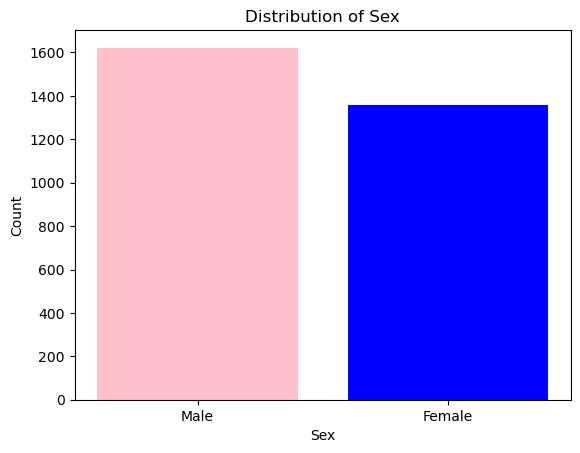

In [553]:
import matplotlib.pyplot as plt

# Ensure indices are unique
df_unique_indices = df[~df.index.duplicated()]

# Filter the DataFrame for Female and Male
sex_df = df_unique_indices[df_unique_indices['sex'].isin(['Female', 'Male'])]

# Count the occurrences of each sex
sex_counts = sex_df['sex'].value_counts()

# Plot the bar chart
plt.bar(sex_counts.index, sex_counts.values, color=['pink', 'blue'])
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Sex')
plt.show()


In [529]:
df.head(10)

,patient_id,tumor_history,cohort,age_at_diagnosis,sex,external_sample_id,Kids_First_Biospecimen_ID_x,extent_of_tumor_resection_x,dkfz_v11_methylation_subclass_x,dkfz_v11_methylation_subclass_score_x,dkfz_v12_methylation_subclass_x,dkfz_v12_methylation_subclass_score_x,molecular_subtype_x,harmonized_diagnosis_x,broad_histology_x,short_histology_x,Kids_First_Biospecimen_ID_y,sample_id_x,aliquot_id_x,Kids_First_Participant_ID_x,experimental_strategy_x,sample_type_x,composition_x,tumor_descriptor_x,primary_site_x,reported_gender_x,race_x,ethnicity_x,age_at_diagnosis_days_x,pathology_diagnosis_x,OS_days_x,OS_status_x,EFS_days_x,age_last_update_days_x,cancer_predispositions_x,cohort_participant_id_x,extent_of_tumor_resection_y,CNS_region_x,germline_sex_estimate_x,age_at_event_days_x,clinical_status_at_event_x,age_at_chemo_start_x,age_at_radiation_start_x,dkfz_v11_methylation_subclass_y,dkfz_v11_methylation_subclass_score_y,dkfz_v12_methylation_subclass_y,dkfz_v12_methylation_subclass_score_y,molecular_subtype_y,Notes_x,harmonized_diagnosis_y,molecular_subtype_methyl_x,broad_histology_y,short_histology_y,cancer_group_x,Kids_First_Biospecimen_ID,sample_id_y,aliquot_id_y,Kids_First_Participant_ID_y,experimental_strategy_y,sample_type_y,composition_y,tumor_descriptor_y,primary_site_y,reported_gender_y,race_y,ethnicity_y,age_at_diagnosis_days_y,pathology_diagnosis_y,OS_days_y,OS_status_y,EFS_days_y,age_last_update_days_y,cancer_predispositions_y,cohort_participant_id_y,extent_of_tumor_resection,CNS_region_y,germline_sex_estimate_y,age_at_event_days_y,clinical_status_at_event_y,age_at_chemo_start_y,age_at_radiation_start_y,Notes_y,molecular_subtype_methyl_y,cancer_group_y,cancer_type,ecDNA_sequences_detected
biosample_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BS_007JTNB8,PT_1MW98VR1,Diagnosis,PBTA-X00,1872.0,Male,7316-2558,BS_W55EBKYC,Gross/Near total resection,"EPN, PF A",0.975,EPN_PFA_1C,0.996586,"EPN, PF A",Posterior fossa group A (PFA) ependymoma,Ependymal tumor,Ependymoma,BS_W55EBKYC,7316-2558,1115500,PT_1MW98VR1,Methylation,Tumor,Solid Tissue,Initial CNS Tumor,Cerebellum/Posterior Fossa,Male,White,Not Hispanic or Latino,1872.0,Ependymoma,687.0,LIVING,687.0,2559.0,None documented,C632220,Gross/Near total resection,Posterior fossa,Male,1872.0,Alive,NaN,1906.0,"EPN, PF A",0.975,EPN_PFA_1C,0.996586,"EPN, PF A",Updated via OpenPedCan subtyping,Posterior fossa group A (PFA) ependymoma,"EPN, PF A",Ependymal tumor,Ependymoma,Ependymoma,BS_W55EBKYC,7316-2558,1115500,PT_1MW98VR1,Methylation,Tumor,Solid Tissue,Initial CNS Tumor,Cerebellum/Posterior Fossa,Male,White,Not Hispanic or Latino,1872.0,Ependymoma,687.0,LIVING,687.0,2559.0,None documented,C632220,Gross/Near total resection,Posterior fossa,Male,1872.0,Alive,NaN,1906.0,Updated via OpenPedCan subtyping,"EPN, PF A",Ependymoma,EPN,0.0
BS_00DBDSHZ,PT_FNMF9D6R,Diagnosis,PBTA-X01,1547.0,Female,7316-6843,BS_S40P99Z1,Gross/Near total resection,ATRT_MYC,0.996,ATRT_MYC,0.995836,"ATRT, MYC","Atypical Teratoid Rhabdoid Tumor, MYC",Embryonal tumor,ATRT,BS_S40P99Z1,7316-6843,1253337,PT_FNMF9D6R,Methylation,Tumor,Solid Tissue,Initial CNS Tumor,Frontal Lobe,Female,Reported Unknown,Unavailable,1547.0,Atypical Teratoid Rhabdoid Tumor (ATRT),NaN,LIVING,NaN,1547.0,None documented,C3473274,Gross/Near total resection,Hemispheric,Female,1547.0,Alive,NaN,NaN,ATRT_MYC,0.996,ATRT_MYC,0.995836,"ATRT, MYC",Subtype based on methylation;Updated via OpenP...,"Atypical Teratoid Rhabdoid Tumor, MYC","ATRT, MYC",Embryonal tumor,ATRT,Atypical Teratoid Rhabdoid Tumor,BS_S40P99Z1,7316-6843,1253337,PT_FNMF9D6R,Methylation,Tumor,Solid Tissue,Initial CNS Tumor,Frontal Lobe,Female,Reported Unknown,Unavailable,1547.0,Atypical Teratoid Rhabdoid Tumor (ATRT),NaN,LIVING,NaN,1547.0,None documented,C3473274,Gross/Near total resection,Hemispheric,Female,1547.0,Alive,NaN,NaN,Subtype based on methylation;Updated via OpenP...,"ATRT, MYC",Atypical Teratoid Rhabdoid Tumor,ATRT,0.0
BS_00GG0R70,

In [534]:
specific_row = df[df.index == 'BS_XJZQA3AP']
specific_row

,patient_id,tumor_history,cohort,age_at_diagnosis,sex,external_sample_id,Kids_First_Biospecimen_ID,extent_of_tumor_resection,Kids_First_Biospecimen_ID,sample_id,aliquot_id,Kids_First_Participant_ID,experimental_strategy,sample_type,composition,tumor_descriptor,primary_site,reported_gender,race,ethnicity,age_at_diagnosis_days,pathology_diagnosis,OS_days,OS_status,EFS_days,age_last_update_days,cancer_predispositions,cohort_participant_id,extent_of_tumor_resection,CNS_region,germline_sex_estimate,age_at_event_days,clinical_status_at_event,age_at_chemo_start,age_at_radiation_start,cancer_type,ecDNA_sequences_detected
biosample_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [531]:
df = df.drop(['dkfz_v11_methylation_subclass_x',
       'dkfz_v11_methylation_subclass_score_x',
       'dkfz_v12_methylation_subclass_x',
       'dkfz_v12_methylation_subclass_score_x', 'molecular_subtype_x',
       'Notes_x', 'harmonized_diagnosis_x', 'molecular_subtype_methyl_x',
       'broad_histology_x', 'short_histology_x', 'cancer_group_x',
       'Kids_First_Biospecimen_ID', 'sample_id_y', 'aliquot_id_y',
       'Kids_First_Participant_ID_y', 'experimental_strategy_y',
       'sample_type_y', 'composition_y', 'tumor_descriptor_y',
       'primary_site_y', 'reported_gender_y', 'race_y', 'ethnicity_y',
       'age_at_diagnosis_days_y', 'pathology_diagnosis_y', 'OS_days_y',
       'OS_status_y', 'EFS_days_y', 'age_last_update_days_y',
       'cancer_predispositions_y', 'cohort_participant_id_y',
       'extent_of_tumor_resection', 'CNS_region_y', 'germline_sex_estimate_y',
       'age_at_event_days_y', 'clinical_status_at_event_y',
       'age_at_chemo_start_y', 'age_at_radiation_start_y',
       'dkfz_v11_methylation_subclass_y',
       'dkfz_v11_methylation_subclass_score_y',
       'dkfz_v12_methylation_subclass_y',
       'dkfz_v12_methylation_subclass_score_y', 'molecular_subtype_y',
       'Notes_y', 'harmonized_diagnosis_y', 'molecular_subtype_methyl_y',
       'broad_histology_y', 'short_histology_y', 'cancer_group_y'
                 ], axis=1)
df = df.rename(columns={'Kids_First_Biospecimen_ID_x':'Kids_First_Biospecimen_ID',
       'extent_of_tumor_resection_x':'extent_of_tumor_resection', 
        'Kids_First_Biospecimen_ID_y':'Kids_First_Biospecimen_ID',
       'sample_id_x':'sample_id', 'aliquot_id_x':'aliquot_id', 
        'Kids_First_Participant_ID_x':'Kids_First_Participant_ID',
       'experimental_strategy_x':'experimental_strategy', 
        'sample_type_x':'sample_type', 'composition_x':'composition',
       'tumor_descriptor_x':'tumor_descriptor', 'primary_site_x':'primary_site',
        'reported_gender_x':'reported_gender', 'race_x':'race',
       'ethnicity_x':'ethnicity', 'age_at_diagnosis_days_x':'age_at_diagnosis_days', 
        'pathology_diagnosis_x':'pathology_diagnosis','OS_days_x':'OS_days', 
        'OS_status_x':'OS_status', 'EFS_days_x':'EFS_days', 
        'age_last_update_days_x':'age_last_update_days',
       'cancer_predispositions_x':'cancer_predispositions', 
        'cohort_participant_id_x':'cohort_participant_id',
       'extent_of_tumor_resection_y':'extent_of_tumor_resection', 'CNS_region_x':
                        'CNS_region','germline_sex_estimate_x':'germline_sex_estimate', 
                        'age_at_event_days_x':'age_at_event_days',
                        'clinical_status_at_event_x':'clinical_status_at_event', 
                        'age_at_chemo_start_x':'age_at_chemo_start',
                        'age_at_radiation_start_x':'age_at_radiation_start'})

In [555]:
df.head()

,patient_id,tumor_history,cohort,age_at_diagnosis,sex,external_sample_id,Kids_First_Biospecimen_ID,extent_of_tumor_resection,cancer_type,ecDNA_sequences_detected
biosample_id,,,,,,,,,,
BS_007JTNB8,PT_1MW98VR1,Diagnosis,PBTA-X00,1872.0,Male,7316-2558,BS_W55EBKYC,Gross/Near total resection,EPN,0.0
BS_00DBDSHZ,PT_FNMF9D6R,Diagnosis,PBTA-X01,1547.0,Female,7316-6843,BS_S40P99Z1,Gross/Near total resection,ATRT,0.0
BS_00GG0R70,PT_YTZJ8K0X,Second Malignancy,PBTA-X01,5774.0,Male,7316-6381,BS_1ZAER3AN,Biopsy only;Gross/Near total resection,HGG,0.0
BS_00JRW8F2,PT_9C7GK4YB,Diagnosis,PBTA-X01,2782.0,Male,7316-8427,BS_00JRW8F2,Gross/Near total resection,LGG,0.0
BS_00TRPEQX,PT_MDWPRDBT,Recurrence,PBTA-X00,2146.0,Female,7316-2660,BS_PNRVT0G5,Gross/Near total resection,HGG,1.0


In [554]:
df.to_csv("biosample_table.csv")